<a href="https://colab.research.google.com/github/RuthStowers/MAT421/blob/main/Module_G_21_4%2C_21_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module G Homework**

*21.4 - Simpson's Rule* 

Simpson's rule uses the sum of quadratic fuctions fit over two subintervals to approximate the integral of a fuction. By using quadratic fuctions, we are able to more accurately imitate the shape of the function and then integrate the area under the quadratics exactly.

For this example we will approximate the number 2 using Simpson's Rule on the function f(x)=sin(x) from (0,pi). As shown, this is a more accurate method than Reimanns Integral, the Midpoint Rule, and the Trapezoid Rule.



In [4]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


*20.5 - Computing Integrals in Python*

Today we can compute integrals easily with technology. In Python, the scipy.integrate sub-package has several functions for computing integrals. The trapz takes as input arguments an array of function values f computed on a numerical grid x.

In the example below we will compare this Python computation of the integral of sin(x) fom 0 to pi using the trapz function, to the Trapezoid Rule.


In [5]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


Sometimes we want to calculate the approximated cumulative integral. To do this we can use the function cumsum in Python as shown using the function -sin(X) and its exact integral -cos(X). We will show the similarity betweent the exact integral and the approximated cumulative integral below by offsetting the plots slightly.

<ipython-input-16-eed14366bfbf>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


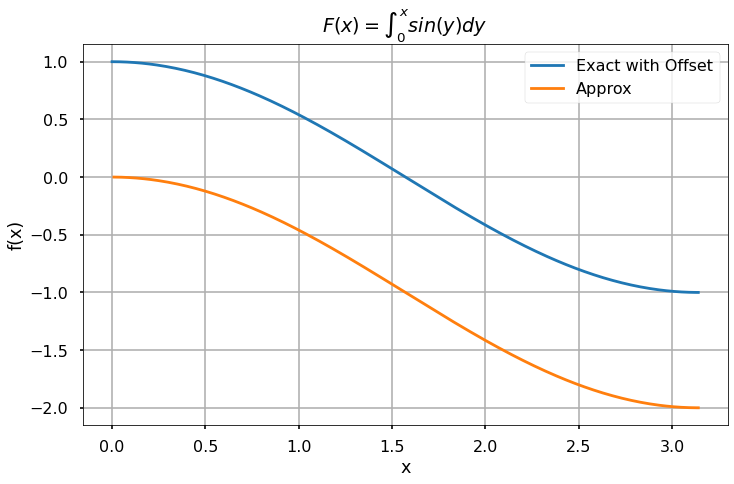

In [16]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = np.cos(x)
F_approx = -cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

Another function for approximating integrals in python is the quad function. We will again use the sin function from 0 to pi to demonstrate. Compare the answer to the exact value of 2. As we can see the error of this approximation is very small.

In [10]:
from scipy.integrate import quad 

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
